# Importing the Libraries
Importing libraries in machine learning is crucial as it enables you to use pre-built functionalities, algorithms, and tools for data manipulation, model building, and evaluation, resulting in efficient and effective development.

Importing neccesary libraries required for the modelling

In [4]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Data Collection & Processing

In [6]:
# take an overview look at the data
names = [
    'id',
    'diagnosis',
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave_points_mean',
    'symmetry_mean',
    'fractal_dimension_mean',
    'radius_se',
    'texture_se',
    'perimeter_se',
    'area_se',
    'smoothness_se',
    'compactness_se',
    'concavity_se',
    'concave_points_se',
    'symmetry_se',
    'fractal_dimension_se',
    'radius_worst',
    'texture_worst',
    'perimeter_worst',
    'area_worst',
    'smoothness_worst',
    'compactness_worst',
    'concavity_worst',
    'concave_points_worst',
    'symmetry_worst',
    'fractal_dimension_worst'
  ]
#Loading the data from sklearn
wbc = pd.read_csv("breast_cancer_dataset.csv.data", header=None,
                names=names)
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# getting some information about the data
wbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# number of rows and columns in the dataset
wbc.shape


(569, 32)

# Data Cleaning

This includes identifying and correcting errors in the dataset, dropping columns that are not needed, also dealing with missing columns, discarding spaces or inconsistent data, removing duplicates, checking statistical measures, handling outliers, and finding correlations between features in the dataset.

In [9]:
# Drop colums that are not needed from the dataset
wbc.drop(['id'], axis=1, inplace=True)


In [10]:
# checking for missing values in the dataset
wbc.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# removing duplicates from the dataset
print("Before removing duplicates:", wbc.duplicated().sum())


Before removing duplicates: 0


In [12]:
# discard spaces from entries
string_columns = wbc.select_dtypes(include=[object])
for column in string_columns:
  wbc[column] = wbc[column].str.strip()


In [13]:
# print the first five rows of the dataframe
wbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
# checking for inconsistent values
wbc.radius_mean.value_counts()

radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64

In [15]:
# statistical measures about the data
wbc.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- B -> Benign (a condition, tumor, or growth that is not cancerous)

- M -> Malignant (a tumor that is cancerous)

In [16]:
# checking the distribution of target variables
wbc["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='diagnosis'>

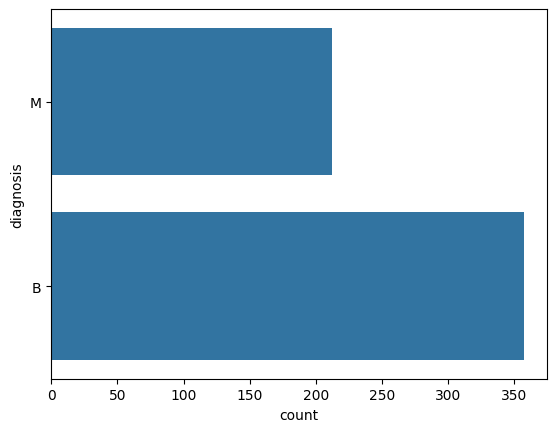

In [17]:
sns.countplot(wbc['diagnosis'],label="counts")

In [18]:
label_types = wbc["diagnosis"].unique()
label_types

array(['M', 'B'], dtype=object)

In [19]:
encoder = LabelEncoder()
wbc['diagnosis'] = encoder.fit_transform(wbc['diagnosis'])

In [20]:
encoder.transform(label_types)

array([1, 0])

- 1 => Malignant
- 0 => Benign

In [21]:
# Finding the correlations between the features
corroletions_features = wbc.corr()

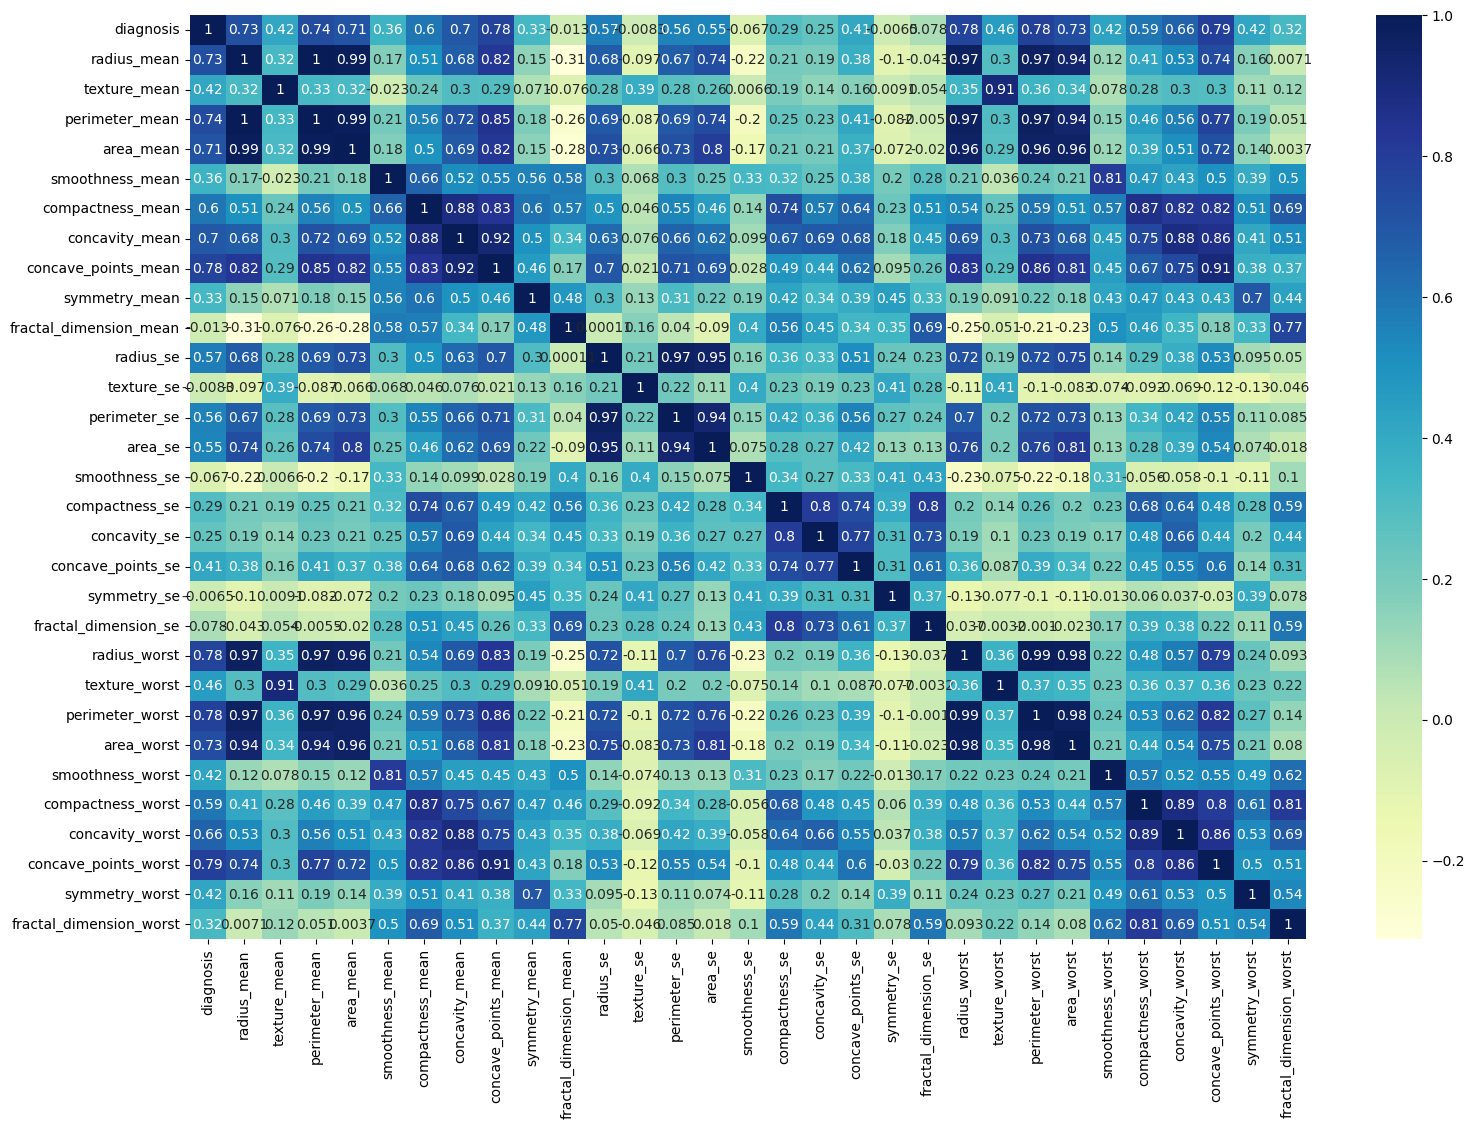

In [22]:
# Showing the corroletions using a heatmap
plt.figure(figsize=(18,12))
sns.heatmap(corroletions_features, annot=True, cmap='YlGnBu')
plt.show()

- Dropped features that are less than 0.4 in the corroletions_features variable to remove less important features

In [23]:
# drop features that are less than 0.4 for better results
temp_features = []

In [24]:
print("Features dropped :")
for i in range(len(corroletions_features)):
  if abs(corroletions_features['diagnosis'][i]) < 0.4:
    print(f"{wbc.columns[i]} : ",corroletions_features['diagnosis'][i])
    temp_features.append(wbc.columns[i])

Features dropped :
smoothness_mean :  0.35855996508593324
symmetry_mean :  0.33049855426254676
fractal_dimension_mean :  -0.012837602698431882
texture_se :  -0.008303332973877035
smoothness_se :  -0.0670160105794875
compactness_se :  0.2929992442488586
concavity_se :  0.2537297659808307
symmetry_se :  -0.006521755870647806
fractal_dimension_se :  0.07797241739025584
fractal_dimension_worst :  0.32387218872082474


In [25]:
print(f'Number of feature dropped : {len(temp_features)}')

Number of feature dropped : 10


In [26]:
wbc = wbc.drop(columns=temp_features, axis=1)

In [27]:
wbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,...,concave_points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst
0,1,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,...,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601
1,1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,...,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750
2,1,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,...,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613
3,1,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,...,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638
4,1,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,...,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364


In [28]:
# Check shape of the data frame
wbc.shape

(569, 21)

In [29]:
wbc.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,concave_points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst
diagnosis,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.080085,0.046058,0.025717,0.284082,2.000321,21.135148,0.009858,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246
1,17.462830,21.604906,115.365377,978.376415,0.145188,0.160775,0.087990,0.609083,4.323929,72.672406,0.015060,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468


## Seperating the features and target
 This is the process of identifying and extracting relevant information or characteristics from the raw data that will be used to train a model as this is crucial because the quality and relevance of the features directly impact the performance of the model

In [30]:
X = wbc.drop(columns='diagnosis', axis=1)
Y = wbc['diagnosis']

In [31]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave_points_mean,radius_se,perimeter_se,area_se,concave_points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.27760,0.30010,0.14710,1.0950,8.589,153.40,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.07864,0.08690,0.07017,0.5435,3.398,74.08,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.15990,0.19740,0.12790,0.7456,4.585,94.03,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.28390,0.24140,0.10520,0.4956,3.445,27.23,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.13280,0.19800,0.10430,0.7572,5.438,94.44,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11590,0.24390,0.13890,1.1760,7.673,158.70,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.10340,0.14400,0.09791,0.7655,5.203,99.04,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.10230,0.09251,0.05302,0.4564,3.425,48.55,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.27700,0.35140,0.15200,0.7260,5.772,86.22,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [32]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## Splitting the data into training data & testing data
The process of splitting the data into training and testing data is crucial for ensuring the quality and relevance of features that directly impact the model's performance.

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(569, 20) (455, 20) (114, 20)


# Model Training

Model training phase of the data science development lifecycle, experts attempt to minimize a loss function over the prediction range by fitting an optimal weight and bias combination to a machine learning algorithm.



## Cross Validation

In [35]:
models = {}

#models with defualt parameter
models['Logistic Regression'] = LogisticRegression(max_iter=3000)
models['SVM'] = SVC(probability=True)
models['Random Forest'] = RandomForestClassifier()
models['KNN'] = KNeighborsClassifier()
models['Naive Bayes'] = GaussianNB()

In [36]:
algo_result = []

In [37]:
for model_name in models:

  model = models[model_name]
  results = cross_validate(model, X_train, Y_train, cv=5, scoring=['accuracy', 'f1'], return_train_score = True)
  algo_result.append(results)
  # test = results["train_accuracy"].predict(X_test)

  print(model_name + ':')
  print("Accuracy:" , 'train:', results['train_accuracy'].mean(), '| test:', results['test_accuracy'].mean())
  print("F1-score:" , 'train:', results['train_f1'].mean(), '| test: ',
  results['test_f1'].mean())
  print("-----------------------------------------------------------")

Logistic Regression:
Accuracy: train: 0.9642857142857142 | test: 0.9472527472527472
F1-score: train: 0.9510460010500825 | test:  0.9282152385072567
-----------------------------------------------------------
SVM:
Accuracy: train: 0.9203296703296703 | test: 0.9164835164835166
F1-score: train: 0.8810338491643345 | test:  0.8746618687835704
-----------------------------------------------------------
Random Forest:
Accuracy: train: 1.0 | test: 0.9626373626373625
F1-score: train: 1.0 | test:  0.9471079772523374
-----------------------------------------------------------
KNN:
Accuracy: train: 0.9489010989010989 | test: 0.9296703296703296
F1-score: train: 0.9280386348130589 | test:  0.9009828667026548
-----------------------------------------------------------
Naive Bayes:
Accuracy: train: 0.9439560439560439 | test: 0.9406593406593406
F1-score: train: 0.9205203105511546 | test:  0.9158846872082165
-----------------------------------------------------------


## ROC CURVE

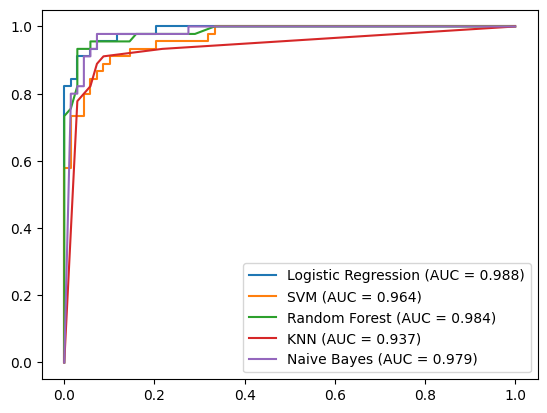

In [38]:
# make one ROC Graph using all algorithms in one graph
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
for model_name in models:
  model = models[model_name]
  model.fit(X_train, Y_train)
  fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, label=model_name + ' (AUC = %0.3f)' % roc_auc)
plt.legend(loc='lower right')
plt.show()

It seems like after analyzing different machine learning algorithms, the Random Forest algorithm stands out as the best choice for this particular dataset. However, it's worth noting that Logistic Regression also produced good results when examining the ROC curve. In order to make a concrete conclusion about which algorithm is truly the best, it's important to also consider the feature Selection and hyperparameter tuning of both algorithms. By taking these factors into account, we can make a more informed decision about which algorithm is truly the most effective for this prediction.

## Feature Selection (Logistic Regression)

In [39]:
from sklearn.feature_selection import SelectFromModel

# Create a LogisticRegression model
model = LogisticRegression(random_state=42)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Create a SelectFromModel object
sfm = SelectFromModel(model, threshold='mean')

# Fit the SelectFromModel object to the training data
sfm.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

SelectFromModel(estimator=LogisticRegression(random_state=42), threshold='mean')

In [40]:
# print('All features:', sfm.feature_names_in_)
print('Selected features:', sfm.feature_names_in_[sfm.get_support()])
print('Number of selected features:', sfm.get_support().sum())

Selected features: ['radius_mean' 'radius_worst' 'texture_worst' 'compactness_worst'
 'concavity_worst']
Number of selected features: 5


In [41]:
X_train_sfm = sfm.transform(X_train)
X_test_sfm = sfm.transform(X_test)

# model.fit(X_train_sfm, Y_train)
# score = model.score(X_test_sfm, Y_test)
# print('Test score:', score)

# Use cross-validation to evaluate the model
scores = cross_validate(model, X_train_sfm, Y_train, cv=5, scoring=['accuracy', 'f1'], return_train_score = True)
print("Accuracy:" , 'train:', scores['train_accuracy'].mean(), '| test:', scores['test_accuracy'].mean())
print("F1-score:" , 'train:', scores['train_f1'].mean(), '| test: ',
scores['test_f1'].mean())

Accuracy: train: 0.9532967032967032 | test: 0.9472527472527472
F1-score: train: 0.9350453348932437 | test:  0.9261590797297865


## Resolving overfitting issues by doing hyperparameter tuning on Logistic Regression
Hyperparameters tuning is the process in machine learning model that helps improve the performance on unseen data.

In [42]:
import warnings

warnings.filterwarnings('ignore')

In [43]:
from sklearn.model_selection import GridSearchCV
# Create a LogisticRegression model with L2 regularization
model = LogisticRegression(random_state=42)
C_range = np.logspace(-3, 3, 5)
param_grid = {
    'solver': ['liblinear', 'lbfgs'],
    'C': C_range,
    'penalty': ['li', 'l2']
    }
grid = GridSearchCV(model, param_grid, cv=5, refit=True, verbose=3)

# Train the model
grid.fit(X_train_sfm, Y_train)

# Get the best model and best parameters
best_model = grid.best_estimator_
best_params = grid.best_params_
best_score = grid.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.001, penalty=li, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, penalty=li, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, penalty=li, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, penalty=li, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, penalty=li, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END ...C=0.001, penalty=li, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, penalty=li, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, penalty=li, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, penalty=li, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, penalty=li, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, penalty=l2, solver=liblinear;, score=0.670 total time=   0.0s
[CV 2/5] END C=0.001, penalty=l2, solve

In [44]:
print('Best estimator:', best_model)
print('Best params:', best_params)
print('Best score:', best_score)

Best estimator: LogisticRegression(C=31.622776601683793, random_state=42)
Best params: {'C': 31.622776601683793, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.9648351648351647


In [45]:
scores = cross_validate(model.set_params(C=31.622776601683793, penalty='l2', solver='lbfgs'), X_train_sfm, Y_train, cv=5, scoring=['accuracy', 'f1'], return_train_score = True)
print("Accuracy:" , 'train:', scores['train_accuracy'].mean(), '| test:', scores['test_accuracy'].mean())
print("F1-score:" , 'train:', scores['train_f1'].mean(), '| test: ',
scores['test_f1'].mean())

Accuracy: train: 0.9670329670329669 | test: 0.9648351648351647
F1-score: train: 0.9547616709783787 | test:  0.9523459624952164


- Overfitting issue has been resolved with the use of hyperparameter


## Model Evaluation (Logistic regression)

## Check the accuracy (Accuracy, sensitivity and specitivity)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
best_params_str = str(best_params).replace("{", "").replace("}", "")
best_params_str

"'C': 31.622776601683793, 'penalty': 'l2', 'solver': 'lbfgs'"

In [48]:
# Replace with your actual true labels and predicted labels
enhanced_model = LogisticRegression(C=31.622776601683793, penalty='l2', solver='lbfgs', random_state=42)

In [49]:
enhanced_model.fit(X_train_sfm, Y_train)
true_labels = Y_test
predicted_labels = enhanced_model.predict(X_test_sfm)

In [50]:
# Get the confusion matrix
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[66  3]
 [ 2 43]]


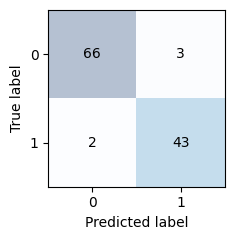

In [51]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

True Positive is 66

False Positive is 3

False Negative is 2

True Negative is 43

In [52]:
# Calculate accuracy
accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / len(true_labels)
print("Accuracy:", accuracy)

# Calculate sensitivity (recall)
true_positives = confusion_matrix[1, 1]
false_negatives = confusion_matrix[1, 0]
sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity (Recall):", sensitivity)

# Calculate specificity
true_negatives = confusion_matrix[0, 0]
false_positives = confusion_matrix[0, 1]
specificity = true_negatives / (true_negatives + false_positives)
print("Specificity:", specificity)

Accuracy: 0.956140350877193
Sensitivity (Recall): 0.9555555555555556
Specificity: 0.9565217391304348


## Feature Selection on Random Forest Classification

In [53]:
from sklearn.feature_selection import SelectFromModel

# Create a Random Forest model
model_rf = RandomForestClassifier(n_jobs=-1)

# Fit the model to the training data
model_rf.fit(X_train, Y_train)

# Create a SelectFromModel object
sfm_rf = SelectFromModel(model_rf, threshold='mean')

# Fit the SelectFromModel object to the training data
sfm_rf.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1), threshold='mean')

In [54]:
# print('All features:', sfm.feature_names_in_)
print('Selected features:', sfm_rf.feature_names_in_[sfm_rf.get_support()])
print('Number of selected features:', sfm_rf.get_support().sum())

Selected features: ['concave_points_mean' 'radius_worst' 'perimeter_worst' 'area_worst'
 'concave_points_worst']
Number of selected features: 5


In [55]:
X_train_sfm_rf = sfm_rf.transform(X_train)
X_test_sfm_rf = sfm_rf.transform(X_test)

# model.fit(X_train_sfm, Y_train)
# score = model.score(X_test_sfm, Y_test)
# print('Test score:', score)

# Use cross-validation to evaluate the model
scores = cross_validate(model_rf, X_train_sfm_rf, Y_train, cv=5, scoring=['accuracy', 'f1'], return_train_score = True)
print("Accuracy:" , 'train:', scores['train_accuracy'].mean(), '| test:', scores['test_accuracy'].mean())
print("F1-score:" , 'train:', scores['train_f1'].mean(), '| test: ',
scores['test_f1'].mean())

Accuracy: train: 1.0 | test: 0.9494505494505494
F1-score: train: 1.0 | test:  0.9298920465871836


## Resolving overfitting issues by doing hyperparameter tuning on Random Forest

In [56]:
import warnings

warnings.filterwarnings('ignore')

In [57]:
from sklearn.model_selection import GridSearchCV
model_rf = RandomForestClassifier(n_jobs=-1)
n_estimators_range = np.arange(100, 500, 100)
max_depth_range = np.arange(1, 10, 1)
param_grid = {
    'n_estimators': n_estimators_range,
    'max_depth': max_depth_range
}
grid_rf = GridSearchCV(model_rf, param_grid, cv=5, refit=True, verbose=3)

# Train the model
grid_rf.fit(X_train_sfm_rf, Y_train)

# Get the best model and best parameters
best_model_rf = grid_rf.best_estimator_
best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END .....max_depth=1, n_estimators=100;, score=0.923 total time=   0.3s
[CV 2/5] END .....max_depth=1, n_estimators=100;, score=0.945 total time=   0.3s
[CV 3/5] END .....max_depth=1, n_estimators=100;, score=0.901 total time=   0.3s
[CV 4/5] END .....max_depth=1, n_estimators=100;, score=0.923 total time=   0.3s
[CV 5/5] END .....max_depth=1, n_estimators=100;, score=0.934 total time=   0.2s
[CV 1/5] END .....max_depth=1, n_estimators=200;, score=0.912 total time=   0.5s
[CV 2/5] END .....max_depth=1, n_estimators=200;, score=0.945 total time=   0.5s
[CV 3/5] END .....max_depth=1, n_estimators=200;, score=0.901 total time=   0.6s
[CV 4/5] END .....max_depth=1, n_estimators=200;, score=0.923 total time=   0.6s
[CV 5/5] END .....max_depth=1, n_estimators=200;, score=0.934 total time=   0.6s
[CV 1/5] END .....max_depth=1, n_estimators=300;, score=0.912 total time=   0.9s
[CV 2/5] END .....max_depth=1, n_estimators=300

In [58]:
print('Best estimator:', best_model_rf)
print('Best params:', best_params_rf)
print('Best score:', best_score_rf)

Best estimator: RandomForestClassifier(max_depth=5, n_jobs=-1)
Best params: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.9516483516483516


In [59]:
scores = cross_validate(model_rf.set_params(max_depth=7, n_estimators=10), X_train_sfm_rf, Y_train, cv=5, scoring=['accuracy', 'f1'], return_train_score = True)
print("Accuracy:" , 'train:', scores['train_accuracy'].mean(), '| test:', scores['test_accuracy'].mean())
print("F1-score:" , 'train:', scores['train_f1'].mean(), '| test: ',
scores['test_f1'].mean())

Accuracy: train: 0.9972527472527473 | test: 0.945054945054945
F1-score: train: 0.9962602083920021 | test:  0.9245138953266793


- Despite hyperparameter tunning on Random Forest, there is still a difference between the training and testing accuracy scores. This means that there is no such effect of the hyperparameter tuning on the Random Forest

## Model Evaluation On Random Forest Classification

## Accuracy, Sensitivity and Specitivity on Random Forest Classification

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
best_params_str = str(best_params_rf).replace("{", "").replace("}", "")
best_params_str

"'max_depth': 5, 'n_estimators': 100"

In [62]:
# Replace with your actual true labels and predicted labels
enhanced_model_rf = RandomForestClassifier(max_depth=4, n_estimators=300)

In [63]:
enhanced_model_rf.fit(X_train_sfm_rf, Y_train)
true_labels = Y_test
predicted_labels = enhanced_model_rf.predict(X_test_sfm_rf)

In [64]:
# Get the confusion matrix
confusion_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[63  6]
 [ 3 42]]


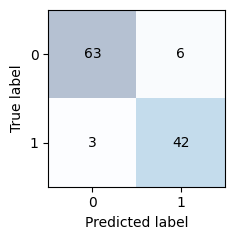

In [65]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

In [66]:
# Calculate accuracy
accuracy = (confusion_matrix[0, 0] + confusion_matrix[1, 1]) / len(true_labels)
print("Accuracy:", accuracy)

# Calculate sensitivity (recall)
true_positives = confusion_matrix[1, 1]
false_negatives = confusion_matrix[1, 0]
sensitivity = true_positives / (true_positives + false_negatives)
print("Sensitivity (Recall):", sensitivity)

# Calculate specificity
true_negatives = confusion_matrix[0, 0]
false_positives = confusion_matrix[0, 1]
specificity = true_negatives / (true_negatives + false_positives)
print("Specificity:", specificity)

Accuracy: 0.9210526315789473
Sensitivity (Recall): 0.9333333333333333
Specificity: 0.9130434782608695


## Explainable AI

In [67]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.6 MB/s eta 0:00:00


In [68]:
import shap

In [69]:
explainer = shap.KernelExplainer(enhanced_model.predict, shap.kmeans(X_train_sfm, 10))

In [70]:
shap_values = explainer.shap_values(X_test_sfm)

  0%|          | 0/114 [00:00<?, ?it/s]

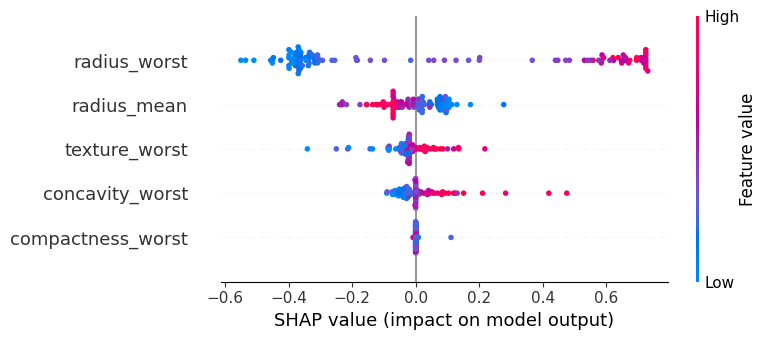

In [71]:
shap.summary_plot(shap_values, X_test_sfm, feature_names=sfm.feature_names_in_[sfm.get_support()])

- As shown above, it explains how the model takes decisions. So in the case of a low radius_worst feature is an indication of the sample data being classified as 0 (Benign) whereas, radius_worst having a high value classifies as 1 (Malignant)

In [72]:
# Use shap force plot to explain individual decision
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test_sfm[0], feature_names=sfm.feature_names_in_[sfm.get_support()])

## Building a Predictive System

In [73]:
import random
random_index = random.randint(0, len(X_test_sfm))
input_data = X_test_sfm[random_index]

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)


#reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = enhanced_model.predict(input_data_reshaped)
print(prediction[0])
print("=========> Breast cancer is Manlignant" if prediction[0] == 1 else "=========> Breast Cancer is Benign")

1
=========> Breast cancer is Manlignant
